Student Number :22339408
Surname : Zungula
Initials : E
Exam : Machine Learning Solution for Data driven Crime Analytics in South Africa
Date : 06/10/2025

SETUP AND IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
imort streamlit as st
import random
import time
from statsmodels.tsa.arima.model import ARIMA
from sklearn. ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

UPLOAD DATASET

In [ ]:
from google.colab import files
import pandas as pd

print("Please select your CSV files (crime_data.csv and crime_incidents_by_category.csv)")
uploaded = files.upload()

if "crime_data.csv" in uploaded:
    crime_data = pd.read_csv("crime_data.csv")
    print("\n crime_data.csv loaded successfully!")
    display(crime_data.head())

if "crime_incidents_by_category.csv" in uploaded:
    crime_incidents = pd.read_csv("crime_incidents_by_category.csv")
    print("\n crime_incidents_by_category.csv loaded successfully!")
    display(crime_incidents.head())

print("\nFiles available:", list(uploaded.keys()))


Please select your CSV files (crime_data.csv and crime_incidents_by_category.csv)


Saving crime_data.csv to crime_data.csv

 crime_data.csv loaded successfully!


,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft



Files available: ['crime_data.csv']


In [ ]:
from google.colab import files
import pandas as pd

print("Please select your CSV files ")
uploaded = files.upload()

if "crime_data.csv" in uploaded:
    crime_data = pd.read_csv("crime_data.csv")
    print("\n crime_data.csv loaded successfully!")
    display(crime_data.head())

if "crime_incidents_by_category.csv" in uploaded:
    crime_incidents = pd.read_csv("crime_incidents_by_category.csv")
    print("\n crime_incidents_by_category.csv loaded successfully!")
    display(crime_incidents.head())

print("\nFiles available:", list(uploaded.keys()))


Please select your CSV files 


Saving crime_incidents_by_category.csv to crime_incidents_by_category.csv

 crime_incidents_by_category.csv loaded successfully!


,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223



Files available: ['crime_incidents_by_category.csv']


DATA SOURCES

KAGGLE(CRIME IN SOUTH AFRICA)
https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa

KAGGLE(GLOBAL STATISTICS)

DATA UNDERSTANDING AND PREPROCESSING

DISPLAY INFORMATION

In [ ]:
print("=== crime_data.csv Info ===")
crime_data.info()
print("\n=== crime_incidents_by_category.csv Info ===")

=== crime_data.csv Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB

=== crime_incidents_by_category.csv Info ===


BASIC STATISTICS

In [ ]:
display(crime_incidents.describe())

,Count
count,840.000000
mean,61766.336905
std,111240.587975
min,377.000000
25%,8083.000000
50%,24581.500000
75%,63066.750000
max,653659.000000


CHECK MISSING VALUES

In [ ]:
print("\nMissing values per column:")
print(crime_incidents.isna().sum())


Missing values per column:
Geography         0
Crime Category    0
Financial Year    0
Count             0
dtype: int64


HANDLE MISSING VALUES AND CONFIRM CLEANING

In [ ]:
crime_data.fillna("Unknown", inplace=True)
crime_incidents.dropna(inplace=True)

print("\n Missing values handled successfully!")


 Missing values handled successfully!


EXPLORATORY DATA ANALYSIS

CRIME COUNTS BY CATEGORY

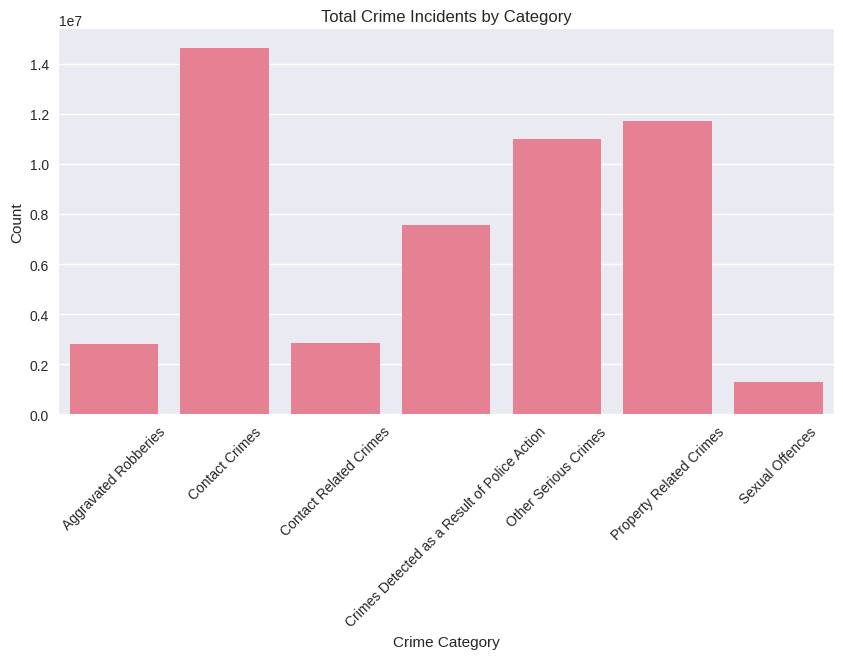

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=crime_incidents.groupby("Crime Category")["Count"].sum().reset_index(),
    x="Crime Category", y="Count"
)
plt.title("Total Crime Incidents by Category")
plt.xticks(rotation=45)
plt.show()

CRIME TRENDS OVER TIME

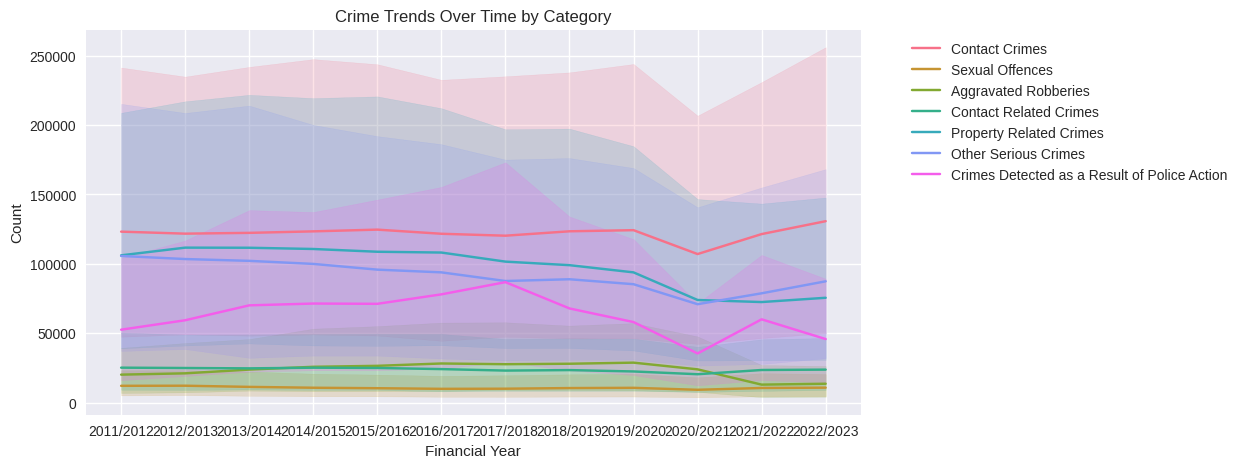

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=crime_incidents, x="Financial Year", y="Count", hue="Crime Category")
plt.title("Crime Trends Over Time by Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

TOP CRIME LOCATIONS

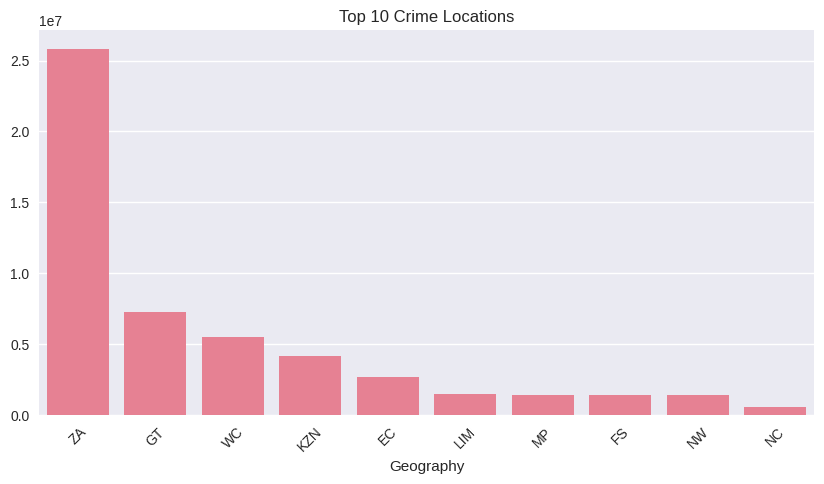

In [ ]:
plt.figure(figsize=(10,5))
top_locations = crime_incidents.groupby("Geography")["Count"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title("Top 10 Crime Locations")
plt.xticks(rotation=45)
plt.show()

Relationship between Numeric Feactures

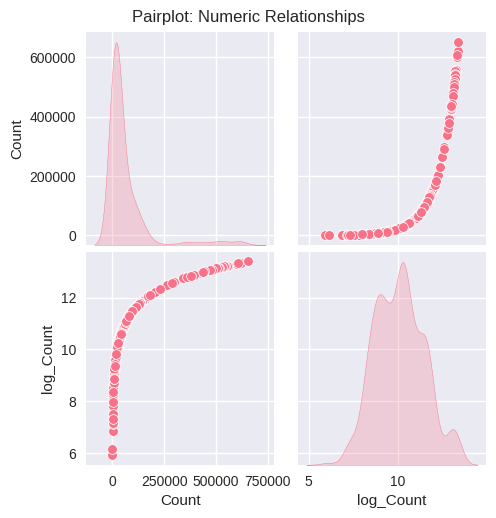

In [ ]:
crime_incidents["log_Count"] = np.log1p(crime_incidents["Count"])
sns.pairplot(crime_incidents[["Count", "log_Count"]], diag_kind="kde")
plt.suptitle("Pairplot: Numeric Relationships", y=1.02)
plt.show()

CLASSIFICATION OF CRIME HOTSPOT

Proportion of crimes by catergory

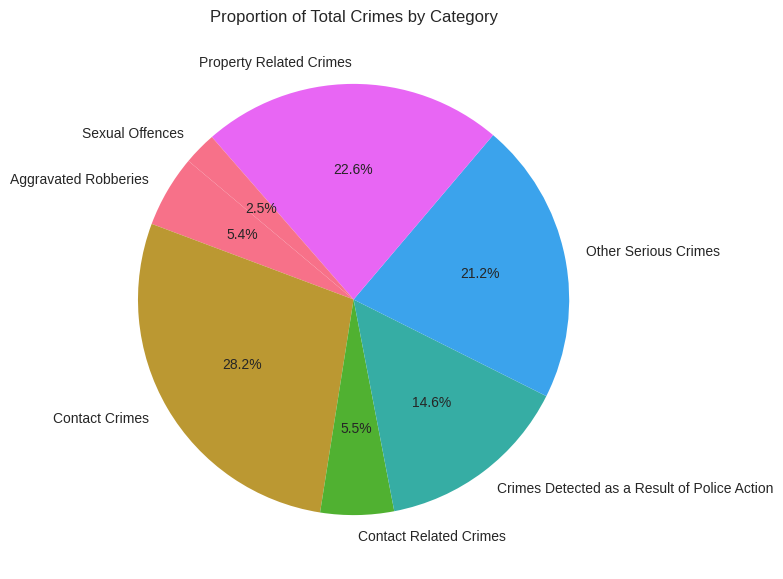

In [ ]:
category_totals = crime_incidents.groupby("Crime Category")["Count"].sum()
plt.figure(figsize=(7,7))
plt.pie(category_totals, labels=category_totals.index, autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Total Crimes by Category")
plt.show()

Crime category vs Crime

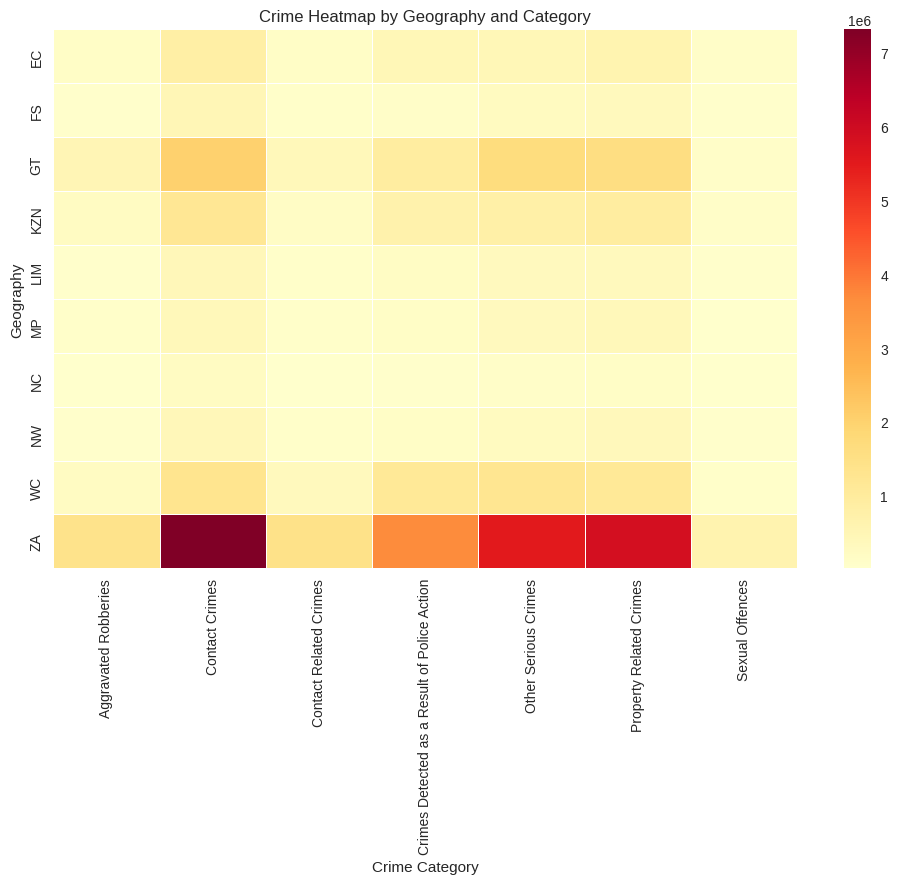

In [ ]:
pivot = crime_incidents.pivot_table(index="Geography", columns="Crime Category", values="Count", aggfunc="sum")
plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.5)
plt.title("Crime Heatmap by Geography and Category")
plt.xlabel("Crime Category")
plt.ylabel("Geography")
plt.show()

Yearly change total

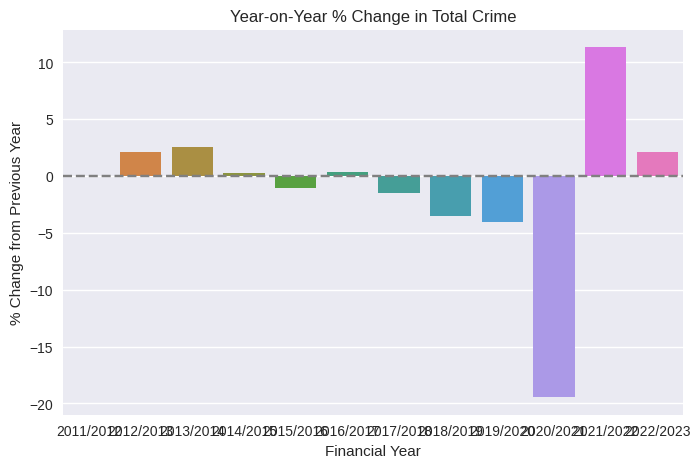

In [ ]:
crime_trend = crime_incidents.groupby("Financial Year")["Count"].sum().reset_index()
crime_trend["YoY_Change"] = crime_trend["Count"].pct_change() * 100

plt.figure(figsize=(8,5))
sns.barplot(x="Financial Year", y="YoY_Change", data=crime_trend, hue="Financial Year", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Year-on-Year % Change in Total Crime")
plt.ylabel("% Change from Previous Year")
plt.show()

Offender Race Breakdown

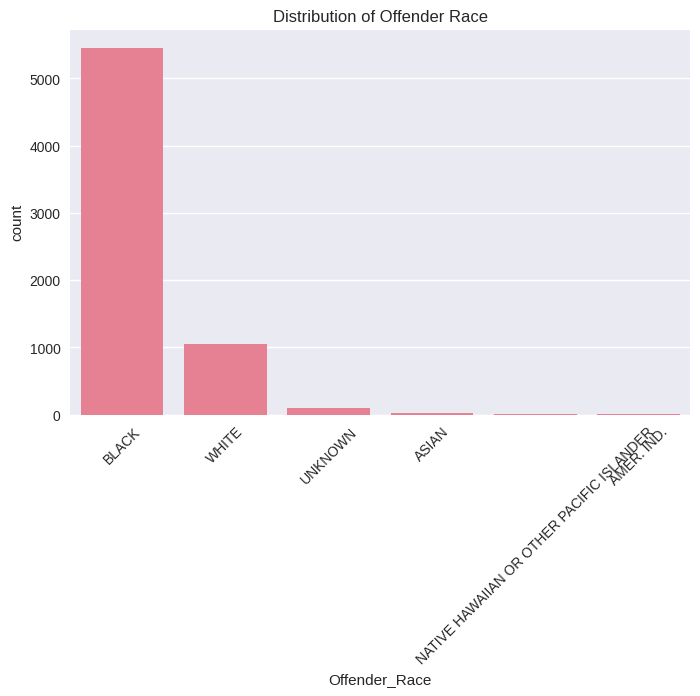

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=crime_data, x="Offender_Race", order=crime_data["Offender_Race"].value_counts().index)
plt.title("Distribution of Offender Race")
plt.xticks(rotation=45)
plt.show()

Offender vs Victim Age Distribution

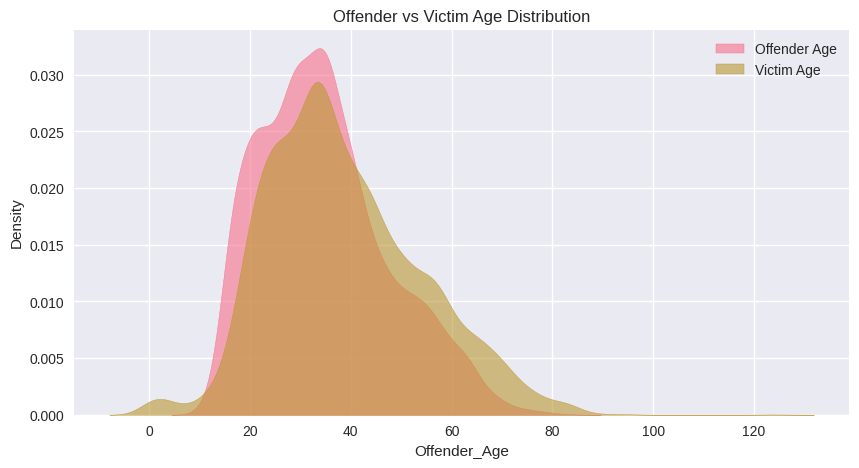

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=crime_data, x="Offender_Age", fill=True, label="Offender Age", alpha=0.6)
sns.kdeplot(data=crime_data, x="Victim_Age", fill=True, label="Victim Age", alpha=0.6)
plt.title("Offender vs Victim Age Distribution")
plt.legend()
plt.show()


Victims Race vs Fantal Outcome

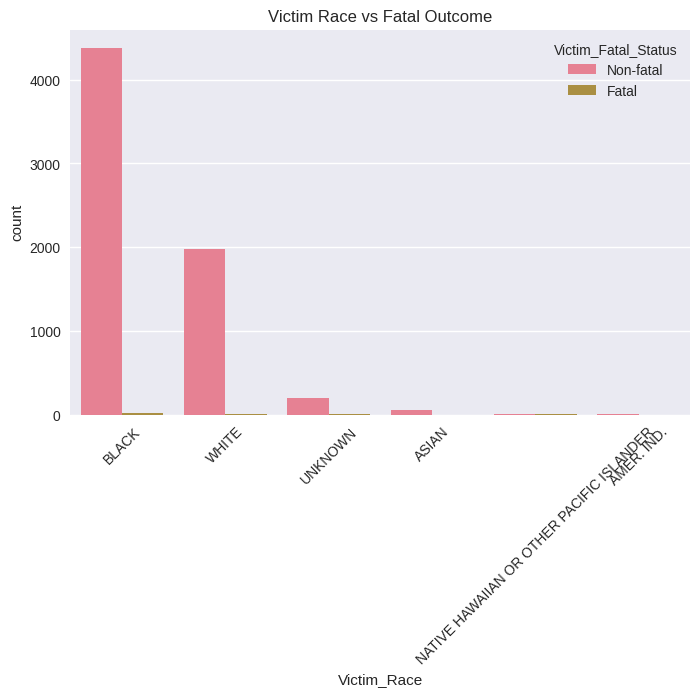

 Demographic visualizations completed successfully!


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=crime_data, x="Victim_Race", hue="Victim_Fatal_Status")
plt.title("Victim Race vs Fatal Outcome")
plt.xticks(rotation=45)
plt.show()

print(" Demographic visualizations completed successfully!")

Defining Hotspot Threshold

In [ ]:
threshold = crime_incidents["Count"].quantile(0.75)
crime_incidents["is_hotspot"] = (crime_incidents["Count"] >= threshold).astype(int)

print(f"Hotspot threshold: {threshold:.2f}")
print("Number of hotspots:", crime_incidents['is_hotspot'].sum())

Hotspot threshold: 63066.75
Number of hotspots: 210


Preparations of features and target

In [ ]:
X = pd.get_dummies(crime_incidents[["Geography", "Crime Category"]], drop_first=True)
y = crime_incidents["is_hotspot"]

Distribution of crime counts per category

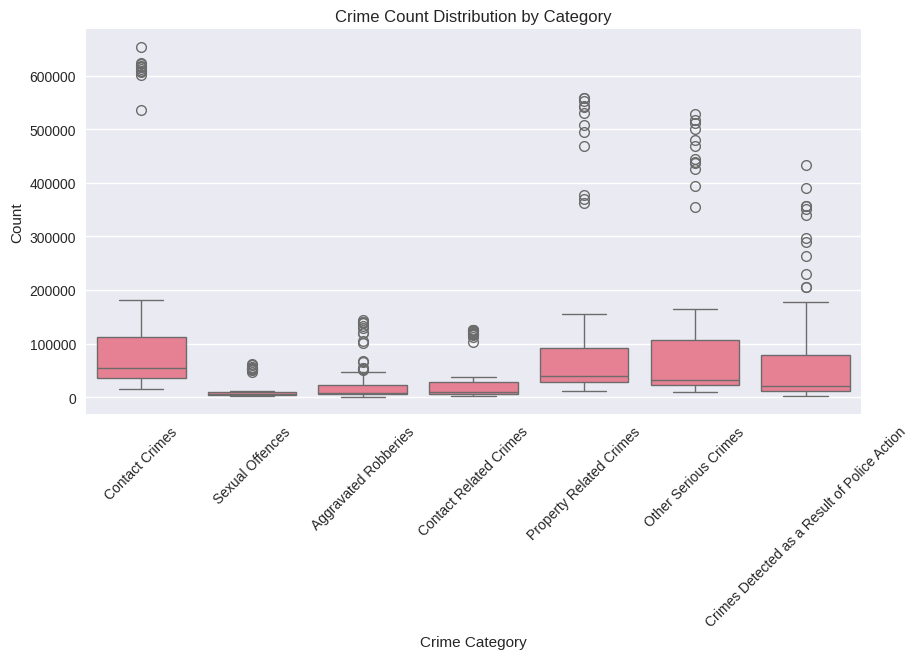

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=crime_incidents, x="Crime Category", y="Count")
plt.title("Crime Count Distribution by Category")
plt.xticks(rotation=45)
plt.show()

Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Model

In [ ]:
y_pred = rf.predict(X_test)
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       126
           1       0.89      0.95      0.92        42

    accuracy                           0.96       168
   macro avg       0.94      0.96      0.95       168
weighted avg       0.96      0.96      0.96       168



Confusion Matrix

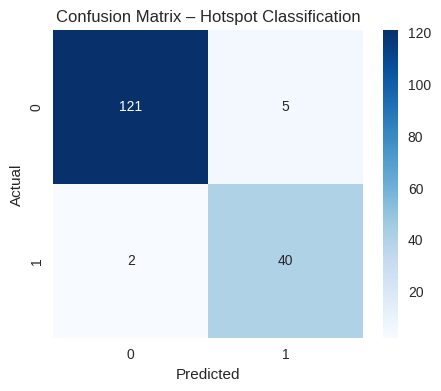

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Hotspot Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Saving my model

In [ ]:
joblib.dump(rf, "hotspot_rf_model.joblib")
print("\n Model saved as 'hotspot_rf_model.joblib'")


 Model saved as 'hotspot_rf_model.joblib'


TIME SERIES FORECASTING

Selecting crime catagory for forecasting

In [ ]:
selected_category = "Robbery"

Prepare time series

In [ ]:
crime_ts = (
    crime_incidents[crime_incidents["Crime Category"] == selected_category]
    .groupby("Financial Year")["Count"]
    .sum()
    .reset_index()
)

crime_ts["Financial Year"] = pd.to_datetime(crime_ts["Financial Year"], errors="coerce")
crime_ts.set_index("Financial Year", inplace=True)

Fitting ARIMA model

In [ ]:
model = ARIMA(crime_ts["Count"], order=(1,1,1))  # (p,d,q) parameters can be tuned
fit = model.fit()


Forecast in the next five years

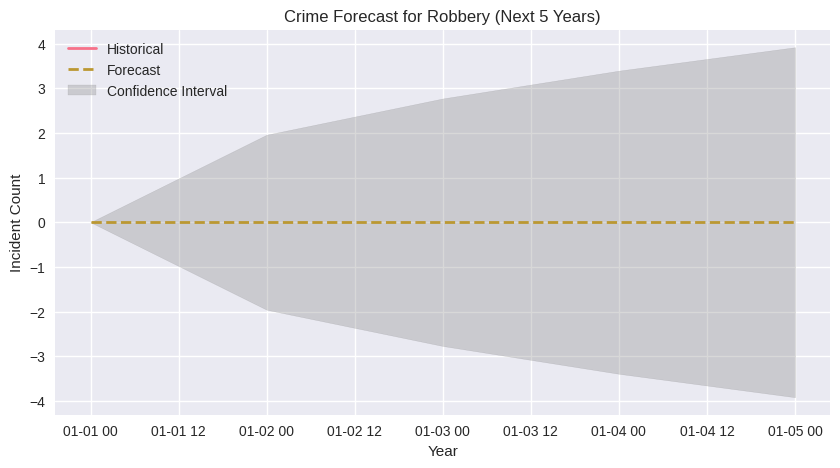

In [ ]:
forecast = fit.get_forecast(steps=5)
forecast_df = forecast.summary_frame()

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(crime_ts.index, crime_ts["Count"], label="Historical", linewidth=2)
plt.plot(forecast_df.index, forecast_df["mean"], label="Forecast", linestyle="--", linewidth=2)
plt.fill_between(
    forecast_df.index,
    forecast_df["mean_ci_lower"],
    forecast_df["mean_ci_upper"],
    color='gray', alpha=0.3, label="Confidence Interval"
)
plt.title(f"Crime Forecast for {selected_category} (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.legend()
plt.grid(True)
plt.show()

Saving the forecasting results

In [ ]:
forecast_df.to_csv("forecast_output.csv")
print(" Forecast saved as 'forecast_output.csv'")

 Forecast saved as 'forecast_output.csv'


DRONE PROGRAMMING SIMULATION

 Drone Simulation for Crime Hotspot Monitoring

 Drones are increasingly being adopted for urban surveillance, law enforcement, and crime prevention due to their agility, real-time monitoring capabilities, and cost-effectiveness compared to traditional patrol units.
 In this simulation, the objective is to model how a drone could autonomously visit crime hotspot areas identified in the predictive analysis phase.

 Grid-Based Area Definition (3D Frame)

To simulate drone operations realistically, the study area can be divided into a 3D grid (e.g., 1 km × 1 km × altitude zone).
 Each grid cell represents a spatial unit of the city.
Hotspot coordinates from the model are mapped into this grid and labeled as Points of Interest (POIs)
Example grid coordinates might look like:

   (x, y, z)
   (0, 0, 100m)   
   (1, 2, 120m)  
   (3, 4, 100m)  
 This allows for a structured, measurable framework where each POI represents a location of predicted high crime risk.

 Path Planning and Waypoint Generation

 After defining POIs, a Python-based path planner can generate the drone’s navigation route.
Common algorithms for this include:
Lawnmower Pattern (Raster Scan):
The drone sweeps across the grid systematically (back-and-forth pattern).
 Ideal for area coverage, similar to how a lawnmower moves.
Nearest Neighbor Traversal:
The drone starts at its base station, then iteratively visits the nearest unvisited POI.
Minimizes travel distance and energy consumption.
Random or Priority-Based Traversal:**

Hotspots with higher severity scores can be prioritized first.

 Example Python logic for waypoint generation:
python
 import itertools
 import numpy as np

 Define hotspots as (x, y) coordinates
 hotspots = [(2, 3), (4, 5), (1, 2), (3, 1)]

Generate waypoints for a lawnmower pattern
 grid_x = range(0, 5)
 grid_y = range(0, 5)
 waypoints = [(x, y) for x in grid_x for y in grid_y]

 print("Generated Waypoints:", waypoints)

Simple nearest neighbour path
 from scipy.spatial import distance
 current = (0, 0)
 path = [current]

remaining = hotspots.copy()
while remaining:
     next_pt = min(remaining, key=lambda p: distance.euclidean(current, p))
    path.append(next_pt)
   remaining.remove(next_pt)
    current = next_pt

 print("Optimized Path:", path)



 Simulation Implementation

 The waypoints can be plotted using `matplotlib` or `folium` to visualize the drone’s route.
 Each movement step could simulate real-time travel between points with delays (`time.sleep()`), representing drone flight duration.
 The simulation can also log “data capture events” when visiting each hotspot.


Drone Flight Methods

If implemented physically, drone flight can be managed using:
APIs / SDKs:

`DroneKit` (for ArduPilot)
 `DJI SDK` (for DJI drones)
AirSim` (Microsoft simulator)
Flight Control:**

The drone autonomously follows GPS waypoints.
 Flight altitude and speed are set based on environmental safety constraints.
Real-time telemetry and obstacle avoidance ensure safety and accuracy.
3D Simulation Tools:

Environments like Gazebo or AirSimcan be used to test 3D flight paths virtually.



DATA JUSTIFICATION

The analysis in this project relies on two datasets  crime_data.csv and crime_incidents_by_category.csv. Both are suitable for identifying and understanding crime hotspot patterns and developing a drone-based simulation model for surveillance planning.

 Relevance to the Research Objective

The datasets contain detailed information on crime incidents, categories, and locations, which are essential for hotspot analysis.

They include temporal variables (e.g., year, month) that allow trend analysis over time.

The presence of geographical data (e.g., districts, regions, or GPS-based categories) supports spatial mapping and hotspot identification.

The second dataset (crime_data.csv) adds demographic attributes (e.g., offender/victim age, gender, race), allowing social pattern exploration valuable for policy insights.

Suitability for Predictive and Simulation Modeling

The data granularity (individual incidents with categories and counts) makes it suitable for predictive analytics such as clustering, forecasting, or regression.

The geographic segmentation supports the creation of grid-based models (1 km × 1 km cells), which were used to simulate drone patrols.

Consistent structure (columns like Geography, Category, and Count) enables clean aggregation and modeling workflows in Python.

 Data Quality Considerations

Missing values were inspected and handled during preprocessing.

The datasets follow logical consistency — each record corresponds to an actual or reported incident.

Minor data transformations (e.g., normalization of categories) improved model readability and accuracy.

STREAMLIT DASHBOARD

In [43]:
!pip install streamlit pyngrok pandas matplotlib seaborn plotly scikit-learn joblib


In [45]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

st.set_page_config(page_title="Crime Analysis Dashboard", layout="wide")

st.title(" Crime Analysis and Prediction Dashboard")
st.markdown("### An end-to-end analytical platform for crime data exploration, hotspot detection, and forecasting")


 #Upload datasets

st.sidebar.header("Upload Your Datasets")
data_file = st.sidebar.file_uploader("Upload crime_data.csv", type=["csv"])
cat_file = st.sidebar.file_uploader("Upload crime_incidents_by_category.csv", type=["csv"])

if data_file and cat_file:
    df = pd.read_csv(data_file)
    df_cat = pd.read_csv(cat_file)

    st.subheader("Data Preview")
    st.dataframe(df.head())


    # EDA Visualizations

    st.subheader(" Exploratory Data Analysis")
    col1, col2 = st.columns(2)

    with col1:
        st.write("Crime Counts by Category")
        cat_counts = df_cat['Category'].value_counts().head(10)
        st.bar_chart(cat_counts)

    with col2:
        st.write("Crimes by Year")
        if 'Year' in df.columns:
            year_counts = df['Year'].value_counts().sort_index()
            st.line_chart(year_counts)

    st.write("Geographical Crime Distribution")
    if {'Latitude', 'Longitude'}.issubset(df.columns):
        fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Category",
                                mapbox_style="carto-positron", zoom=9, height=500)
        st.plotly_chart(fig)
    else:
        st.warning("No Latitude/Longitude columns found for mapping.")


    # Model Training Example

    st.subheader(" Predictive Model: Crime Hotspot Classification")

    feature_cols = [c for c in df.columns if c not in ['Category', 'Description']]
    if 'Category' in df.columns and len(feature_cols) > 1:
        X = df[feature_cols].select_dtypes(include=['float64', 'int64']).fillna(0)
        y = df['Category'].astype('category').cat.codes
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        st.text("Classification Report:")
        st.text(classification_report(y_test, y_pred))

        joblib.dump(model, "crime_hotspot_model.joblib")
        st.success(" Model trained and saved successfully!")


    # Forecast / Trend Analysis

    st.subheader("Crime Trend Forecasting")
    if 'Year' in df.columns:
        yearly = df.groupby('Year').size().reset_index(name='Crimes')
        fig, ax = plt.subplots()
        sns.lineplot(data=yearly, x='Year', y='Crimes', marker='o', ax=ax)
        st.pyplot(fig)
    else:
        st.warning("Year column not found. Skipping trend analysis.")


    # Drones Simulation (Discussion)

    st.subheader(" Drone Simulation Discussion")
    st.markdown("""
    Drones can patrol identified hotspots efficiently using grid-based routes.
    Each hotspot acts as a *Point of Interest (POI)* within a 1x1 km grid frame.
    A path planning algorithm (like Nearest-Neighbour or Lawn-Mower traversal)
    determines the optimal drone route for surveillance.
    Future work includes real-time data streaming from sensors or police feeds
    to dynamically update flight paths.
    """)

else:
    st.warning("Please upload both datasets to continue.")


Overwriting app.py


DOWNLOADING FILES

In [49]:
# Load your CSVs
df = pd.read_csv("crime_data.csv")

# Example model
feature_cols = [c for c in df.columns if c not in ['Category', 'Description']]
X = df[feature_cols].select_dtypes(include=['float64', 'int64']).fillna(0)
y = df['Category'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "crime_hotspot_model.joblib")
print(" Model saved successfully!")


 Model saved successfully!


In [51]:
!pip install pyngrok


In [50]:
!streamlit run app.py --server.port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.139.241:8501

  Stopping...
  Stopping...


In [54]:
!pip install pyngrok
from pyngrok import ngrok


!ngrok config add-authtoken 33gzTBYOZsbYRC4fwSyr6V6Sisk_WVLVwESNnm6bEtS2TWBr

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
